Joshua Moe | jmoe5@uncc.edu | Programming II

# Midterm programming assignment
# Tasks:
## 1. Generate plots (use sort() and head() to make visualizations of most affected regions)
###   a. area map of deaths by country within last 8 days
###   b. line graph of deaths by US state
###   c. line graph of (confirmed cases - recovered) by US State
## 2. Parsing the relevant table, tell me:
###    a. What the highest single day increase in confirmed cases by Country, and produce a line graph displaying this
###    b. The highest single day increase in confirmed cases by US State, with a line graph displaying this
## 3. Edit credit opportunity: Think of anything else cool you could query or graph? Show it off!

### Make sure you have formatted your notebook to the best of your ability. This includes comments, markdown headers separating sections/tasks.

for updated datasets (you are not required to use the most up to date) see:
https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data/csse_covid_19_time_series

In [1]:
import pandas as pd

path = '.'
#path = "/Users/swhaley9/Downloads"

confirmed = pd.read_csv(path + "/time_series_19-covid-Confirmed.csv")
deaths = pd.read_csv(path + "/time_series_19-covid-Deaths.csv")
recovered = pd.read_csv(path + "/time_series_19-covid-Recovered.csv")

# 1. Generate plots (use sort() and head() to make visualizations of most affected regions)

## a. area map of deaths by country within last 8 days

# For whatever reason, whenever I use the plot functions, my notebook sometimes doesn't plot the first time, but running the block again makes it work.

First, I am going to inspect the layout of the 'deaths' dataframe.

In [2]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,8,8,8,8,8,8,8,8,8,8
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,"Collin County, TX",US,33.1795,-96.4930,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,"Jefferson County, KY",US,38.1938,-85.6435,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,"Jefferson Parish, LA",US,29.6499,-90.1121,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,"Shasta County, CA",US,40.7909,-121.8474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The 44th column through to the 51st column are the last 8 days.

In [3]:
deaths.iloc[:,44:52]

,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,6,6,6,6,6,6,6,6
1,8,8,8,8,8,8,8,8
2,6,6,6,6,6,6,6,6
3,1,1,1,1,1,1,1,1
4,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...
261,0,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0
263,0,0,0,0,0,0,0,0
264,0,0,0,0,0,0,0,0


I am making a copy of the 'deaths' dataframe to work with, in addition to other copies, to maintain backups.
The 52th column is going to be set to the row's country. This is to parse columns better, group and sort the outcomes.

In [4]:
deaths2 = deaths.copy()
deaths2.insert(52,'Country',deaths['Country/Region'])

In [5]:
DEATH = deaths2.iloc[:,44:53].groupby('Country').sum()

In [6]:
DEATHv2 = DEATH.sort_values(by="3/9/20",ascending = False)

In [7]:
DEATHv2

,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Country,,,,,,,,
Mainland China,2912,2945,2981,3013,3042,3070,3097,3120
Italy,52,79,107,148,197,233,366,463
Iran,66,77,92,107,124,145,194,237
South Korea,28,28,35,35,42,44,50,53
Spain,0,1,2,3,5,10,17,28
...,...,...,...,...,...,...,...,...
French Guiana,0,0,0,0,0,0,0,0
Finland,0,0,0,0,0,0,0,0
Faroe Islands,0,0,0,0,0,0,0,0


Now that I have a dataframe of the last 8 days, I can create a new dataframe consisting of the difference of the last 8 days.

In [8]:
Last_8_Days = DEATHv2['3/9/20'] - DEATHv2['3/2/20']
Last_8_Days

Country
Mainland China    208
Italy             411
Iran              171
South Korea        25
Spain              28
                 ... 
French Guiana       0
Finland             0
Faroe Islands       0
Estonia             0
Vietnam             0
Length: 111, dtype: int64

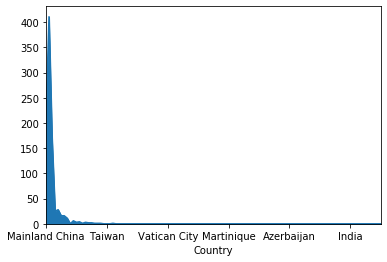

In [10]:
Day_Plot = Last_8_Days.plot.area()

This plot 'works' but is too crowded to show much detail.

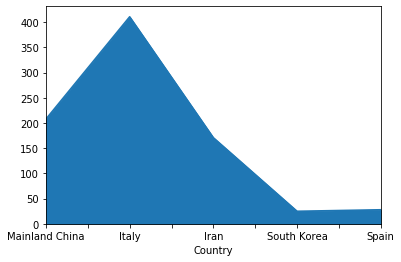

In [11]:
Day_Plotv2 = Last_8_Days.head().plot.area()

By using the head() function, much more information can be seen. Here Italy had the most deaths in the last 8 days of all countries. 

## b. line graph of deaths by US state

In [12]:
deaths

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,8,8,8,8,8,8,8,8,8,8
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,"Collin County, TX",US,33.1795,-96.4930,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,"Jefferson County, KY",US,38.1938,-85.6435,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,"Jefferson Parish, LA",US,29.6499,-90.1121,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,"Shasta County, CA",US,40.7909,-121.8474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


I need to parse the 'deaths' dataframe for rows that consist only of data regarding the United States.

In [13]:
deaths_US = deaths[deaths["Country/Region"] == 'US']
deaths_US

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
35,"King County, WA",US,47.6062,-122.3321,0,0,0,0,0,0,...,1,1,5,6,9,10,12,15,17,17
36,"Cook County, IL",US,41.7377,-87.6976,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
45,"Los Angeles, CA",US,34.0522,-118.2437,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
62,"San Benito, CA",US,36.5761,-120.9876,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
64,"Madison, WI",US,43.0731,-89.4012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,"Collin County, TX",US,33.1795,-96.4930,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,"Jefferson County, KY",US,38.1938,-85.6435,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,"Jefferson Parish, LA",US,29.6499,-90.1121,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,"Shasta County, CA",US,40.7909,-121.8474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Since I want to create a graph of deaths by US state, I need to create a new column for 'state' to group, sort and plot.
Previously, I used another method to add a new column by using '.insert(column_index, name, data)' but I wanted to see if this method below works too. 
It does.

In [14]:
deaths_US["State"] = deaths_US["Province/State"].str.split(",",n=2,expand=True)[1] #expand turns this into a dataframe
deaths_US

C:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,State
35,"King County, WA",US,47.6062,-122.3321,0,0,0,0,0,0,...,1,5,6,9,10,12,15,17,17,WA
36,"Cook County, IL",US,41.7377,-87.6976,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,IL
45,"Los Angeles, CA",US,34.0522,-118.2437,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CA
62,"San Benito, CA",US,36.5761,-120.9876,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CA
64,"Madison, WI",US,43.0731,-89.4012,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,WI
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,"Collin County, TX",US,33.1795,-96.4930,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,TX
262,"Jefferson County, KY",US,38.1938,-85.6435,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,KY
263,"Jefferson Parish, LA",US,29.6499,-90.1121,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,LA
264,"Shasta County, CA",US,40.7909,-121.8474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,CA


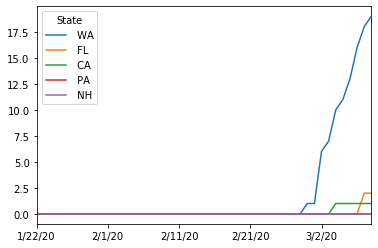

In [15]:
deaths_by_state = deaths_US.iloc[:,4:53].groupby("State").sum()
deaths_by_state.sort_values(by="3/9/20",ascending=False,inplace=True)
#deaths_by_state
deaths_by_state.head().T.plot()

I chose to use head() for this problem, since only 3 states in these datasets are the only ones that had a death count.

In [16]:
#deaths_by_state

## c. line graph of (confirmed cases - recovered) by US State

In [17]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,411,413,414,414,418,418,422,426,428,428
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,102,119,120,124,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,"Collin County, TX",US,33.1795,-96.4930,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
262,"Jefferson County, KY",US,38.1938,-85.6435,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
263,"Jefferson Parish, LA",US,29.6499,-90.1121,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
264,"Shasta County, CA",US,40.7909,-121.8474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


I need to subtract 'recovered' dataframe from the 'confirmed' dataframe. I cannot do that directly, so I need to 
subset columns from both dataframe as such to include only numeric data.

Once complete, I will make a new dataframe called 'current' and use that to create the line graph.

In [18]:
confirmed_US = confirmed[confirmed["Country/Region"] == 'US']

In [19]:
Confirmed_US = confirmed_US.copy()
Confirmed_US.insert(52,'State',confirmed_US["Province/State"].str.split(",",n=2,expand=True)[1])

In [20]:
Confirmed_USv2 = Confirmed_US.iloc[:,4:53].groupby("State").sum()
#Confirmed_USv2.sort_values(by="3/9/20",ascending=False,inplace=True)
Confirmed_USv2

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
State,,,,,,,,,,,,,,,,,,,,,
AZ,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,2,5,5,5
CA,0,0,0,0,2,2,2,2,2,3,...,12,12,21,25,35,51,59,81,98,104
CA (From Diamond Princess),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,8,8,8
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,1
D.C.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
FL,0,0,0,0,0,0,0,0,0,0,...,0,0,2,3,3,4,4,8,11,14
GA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,3,6,5,10
HI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2


In [21]:
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,868,873,917,936,956,970,979,979,984,984
1,Beijing,Mainland China,40.1824,116.4142,0,0,1,2,2,2,...,271,276,282,288,297,297,299,303,308,315
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,438,450,469,490,502,512,513,526,527,542
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,243,247,255,260,270,277,284,295,295,295
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,82,84,85,86,87,87,87,87,87,88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,"Collin County, TX",US,33.1795,-96.4930,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,"Jefferson County, KY",US,38.1938,-85.6435,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,"Jefferson Parish, LA",US,29.6499,-90.1121,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
264,"Shasta County, CA",US,40.7909,-121.8474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
recovered_US = recovered[recovered["Country/Region"] == 'US']

In [23]:
Recovered_US = recovered_US.copy()
Recovered_US.insert(52,'State',recovered_US["Province/State"].str.split(",",n=2,expand=True)[1])

In [24]:
Recovered_USv2 = Recovered_US.iloc[:,4:53].groupby("State").sum()
#Recovered_USv2.sort_values(by="3/9/20",ascending=False,inplace=True)
Recovered_USv2

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
State,,,,,,,,,,,,,,,,,,,,,
AZ,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
CA,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
CA (From Diamond Princess),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D.C.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
FL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
HI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
current = Confirmed_USv2.iloc[:,4:52] - Recovered_USv2.iloc[:,4:52]

In [26]:
current 

,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
State,,,,,,,,,,,,,,,,,,,,,
AZ,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,1,4,4,4
CA,2,2,2,2,2,3,3,3,6,6,...,10,10,19,23,33,49,57,79,96,102
CA (From Diamond Princess),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,8,8,8
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,1
D.C.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
FL,0,0,0,0,0,0,0,0,0,0,...,0,0,2,3,3,4,4,8,11,14
GA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,3,6,5,10
HI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2


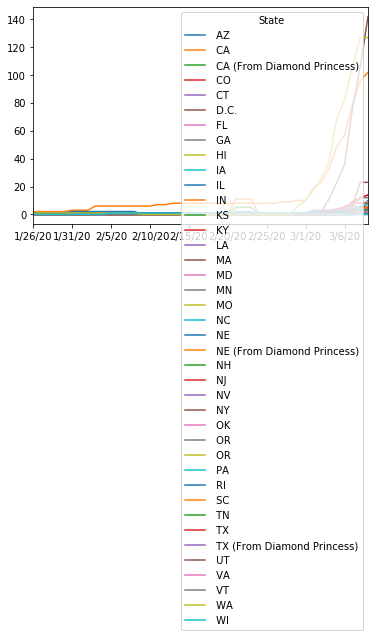

In [27]:
current.T.plot()

# 2. Parsing the relevant table, tell me: 

## a. What the highest single day increase in confirmed cases by Country, and produce a line graph displaying this


In [28]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
0,Anhui,Mainland China,31.8257,117.2264,1,9,15,39,60,70,...,990,990,990,990,990,990,990,990,990,990
1,Beijing,Mainland China,40.1824,116.4142,14,22,36,41,68,80,...,411,413,414,414,418,418,422,426,428,428
2,Chongqing,Mainland China,30.0572,107.8740,6,9,27,57,75,110,...,576,576,576,576,576,576,576,576,576,576
3,Fujian,Mainland China,26.0789,117.9874,1,5,10,18,35,59,...,296,296,296,296,296,296,296,296,296,296
4,Gansu,Mainland China,36.0611,103.8343,0,2,2,4,7,14,...,91,91,91,91,91,102,119,120,124,124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,"Collin County, TX",US,33.1795,-96.4930,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
262,"Jefferson County, KY",US,38.1938,-85.6435,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
263,"Jefferson Parish, LA",US,29.6499,-90.1121,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
264,"Shasta County, CA",US,40.7909,-121.8474,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [29]:
confirmed_global = confirmed.copy()

In [30]:
confirmed_global.insert(52,'Country',confirmed['Country/Region'])

In [31]:
Confirmed_Global = confirmed_global.iloc[:,4:53].groupby('Country').sum()
Confirmed_Globalv2 = Confirmed_Global.sort_values(by="3/9/20",ascending = False)
Confirmed_Globalv2

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
Country,,,,,,,,,,,,,,,,,,,,,
Mainland China,547,639,916,1399,2062,2863,5494,6070,8124,9783,...,79251,79826,80026,80151,80271,80422,80573,80652,80699,80735
Italy,0,0,0,0,0,0,0,0,0,2,...,1128,1694,2036,2502,3089,3858,4636,5883,7375,9172
South Korea,1,1,2,2,3,4,4,4,4,11,...,3150,3736,4335,5186,5621,6088,6593,7041,7314,7478
Iran,0,0,0,0,0,0,0,0,0,0,...,593,978,1501,2336,2922,3513,4747,5823,6566,7161
France,0,0,2,3,3,3,4,5,5,5,...,100,130,191,204,285,377,653,949,1126,1209
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Jordan,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
Paraguay,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
Colombia,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,1,1


Now I have a dataframe I can use to find each Country's highest single day increase of confirmed cases.

Here, I am testing methods and limits of splicing to be used later.

In [32]:
#Confirmed_Globalv2.loc['Mainland China']['1/24/20']

In [33]:
#Confirmed_Globalv2.loc['Mainland China','1/24/20']

In [34]:
#test_2a = Confirmed_Globalv2.loc['Mainland China']
#test_2a[0]

In [35]:
#Confirmed_Globalv2.loc['Mainland China'][0]

In [36]:
#for i in range(0,len(Confirmed_Globalv2.iloc[0])-1):
#    print(Confirmed_Globalv2.iloc[0,i])

In the following cell, I will be looping through countries to find their single day highest increase of confirmed cases and set comparisons to find the overall highest 'single day highest increase of confirmed cases'.

In [37]:
#len(Confirmed_Globalv2.index) # 111
#len(Confirmed_Globalv2.columns) # 48
#Confirmed_Globalv2.iloc[0][0:2] # 0 included; 2 not included



date = None                            # This is for pointing out when such day occurred    
hishest_country = None                 # This is for the problem
highest_one_day_increase_count = None  # This is for the problem

for country in Confirmed_Globalv2.index:  #for country index in list of country indexes
    
    for day in range(0,len(Confirmed_Globalv2.columns)):   #for coulumn (date) in list of coulumns (dates)
        if day != len(Confirmed_Globalv2.columns) - 1: # Since I am comparing today and tomorrow, if the day is the last day, there will not be a tomorrow. Out of index error.
            
            increased = Confirmed_Globalv2.loc[country][day+1] - Confirmed_Globalv2.loc[country][day] # Comparing the difference between tomorrow and today
            
            if highest_one_day_increase_count == None:
                
                date = Confirmed_Globalv2.columns[day+1]
                highest_country = country 
                highest_one_day_increase_count = increased
            else:
                
                if increased > highest_one_day_increase_count:
                    
                    date = Confirmed_Globalv2.columns[day+1]
                    highest_country = country
                    highest_one_day_increase_count = increased
                else:
                    continue
                    
   
    

In [38]:
print("The country with the highest one day increase of conformed cases: "  + highest_country)
print("The amount corresponding to that one day increase: " + str(highest_one_day_increase_count))
print("The day where such event occurred: " + date)

The country with the highest one day increase of conformed cases: Mainland China
The amount corresponding to that one day increase: 15133
The day where such event occurred: 2/13/20


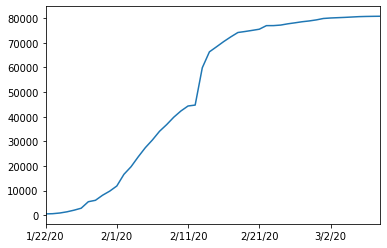

In [39]:
Confirmed_Globalv2.loc[highest_country].T.plot()

## b. The highest single day increase in confirmed cases by US State, with a line graph displaying this

In [40]:
Confirmed_USv2

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,2/29/20,3/1/20,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20
State,,,,,,,,,,,,,,,,,,,,,
AZ,0,0,0,0,1,1,1,1,1,1,...,1,1,1,1,1,1,2,5,5,5
CA,0,0,0,0,2,2,2,2,2,3,...,12,12,21,25,35,51,59,81,98,104
CA (From Diamond Princess),0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,4,8,8,8
CT,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,1
D.C.,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2,2
FL,0,0,0,0,0,0,0,0,0,0,...,0,0,2,3,3,4,4,8,11,14
GA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,2,2,3,6,5,10
HI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,2


In [41]:
date_US = None                            # This is for pointing out when such day occurred    
hishest_state = None                      # This is for the problem
highest_one_day_increase_count_US = None  # This is for the problem

for state in Confirmed_USv2.index:  #for state index in list of state indexes
    
    for day in range(0,len(Confirmed_USv2.columns)):   #for coulumn (date) in list of coulumns (dates)
        if day != len(Confirmed_USv2.columns) - 1: # Since I am comparing today and tomorrow, if the day is the last day, there will not be a tomorrow. Out of index error.
            
            increased = Confirmed_USv2.loc[state][day+1] - Confirmed_USv2.loc[state][day] # Comparing the difference between tomorrow and today
            
            if highest_one_day_increase_count_US == None:
                
                date_US = Confirmed_USv2.columns[day+1]
                highest_state = state 
                highest_one_day_increase_count_US = increased
            else:
                
                if increased > highest_one_day_increase_count_US:
                    
                    date_US = Confirmed_USv2.columns[day+1]
                    highest_state = state
                    highest_one_day_increase_count_US = increased
                else:
                    continue
                    

In [42]:
print("The state with the highest one day increase of conformed cases: "  + highest_state)
print("The amount corresponding to that one day increase: " + str(highest_one_day_increase_count_US))
print("The day where such event occurred: " + date_US)

The state with the highest one day increase of conformed cases:  NY
The amount corresponding to that one day increase: 40
The day where such event occurred: 3/7/20


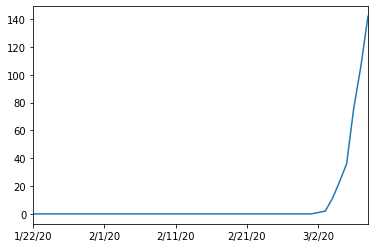

In [43]:
Confirmed_USv2.loc[highest_state].T.plot()